In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


In [3]:
inputBasePath = "/content/drive/MyDrive/CDD-CESM_last"
outputBasePath = "/content/drive/MyDrive/imagearraynew"

In [4]:
image_width = 224
image_height = 224

In [5]:
classes = ['Benign','Malignant','Normal']

In [6]:
os.chdir(inputBasePath)

In [7]:
X = []
Y = []

In [8]:
i = 0
for class1 in classes:
  os.chdir(class1)
  print('=> '+class1)
  for files in os.listdir('./'):
    img = cv2.imread(files)
    img = cv2.resize(img, (image_width,image_height))
    X.append(img)
    Y.append(class1)
    i = i + 1
  os.chdir('..')

=> Benign
=> Malignant
=> Normal


In [9]:
print("X : ",len(X))
print("Y : ",len(Y))

X :  17006
Y :  17006


In [10]:
X = np.array(X).reshape(-1,image_width,image_height,3)

Y = np.array(Y)

print("X : ",X.shape)
print("Y : ",Y.shape)

print("X : ",len(X))
print("Y : ",len(Y))

X :  (17006, 224, 224, 3)
Y :  (17006,)
X :  17006
Y :  17006


In [11]:
os.chdir('..')

In [12]:
os.chdir("imagearraynew")

In [13]:
np.save(str(image_width)+'x'+str(image_height)+'_images', X)

np.save(str(image_width)+'x'+str(image_height)+'_labels', Y)

print("[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED \n ")

[ INFO - STAGE1 ]  NUMPY ARRAY CREATION COMPLETED 
 


In [14]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [15]:
data = np.load('/content/drive/MyDrive/imagearraynew/224x224_images.npy')
labels = np.load('/content/drive/MyDrive/imagearraynew/224x224_labels.npy')
data.shape

(17006, 224, 224, 3)

In [16]:
labelEn = LabelEncoder()
labels = labelEn.fit_transform(labels)
labels = to_categorical(labels)

In [17]:
data =  data.reshape(-1,image_width , image_height , 3)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = .05, shuffle = True)

In [19]:
print(
"""
x_train shape: {}
x_test shape: {}
y_train shape: {}
y_test shape: {}

""".format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))


x_train shape: (16155, 224, 224, 3)
x_test shape: (851, 224, 224, 3)
y_train shape: (16155, 3)
y_test shape: (851, 3)




In [20]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = .05, shuffle = True,random_state=42)

In [21]:
print(y_train.shape)
print(y_validate.shape)

(15347, 3)
(808, 3)


In [22]:
!pip install keras
import keras

In [23]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

In [26]:
tf_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
tf_model.trainable = False
inputs = layers.Input(shape=(224, 224, 3), name='image_input')
scaling = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
x = scaling(inputs)
x = tf_model(x,training=False)
x = layers.GlobalAveragePooling2D(name='Flatten')(x)
x = layers.Dense(1024, activation='relu', name='Dense_1')(x)
outputs = layers.Dense(3, activation='softmax', name='Predictions')(x)
model_vgg = tf.keras.Model(inputs, outputs)
model_vgg.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [27]:
history_vgg = model_vgg.fit(x_train, y_train, epochs=80, batch_size = 16, validation_data=(x_validate, y_validate), callbacks=[callback])

Epoch 1/80
960/960 [==============================] - 78s 74ms/step - loss: 1.0584 - accuracy: 0.4318 - val_loss: 1.0508 - val_accuracy: 0.4233
Epoch 2/80
960/960 [==============================] - 66s 69ms/step - loss: 1.0229 - accuracy: 0.4734 - val_loss: 1.0462 - val_accuracy: 0.4480
Epoch 3/80
960/960 [==============================] - 66s 69ms/step - loss: 1.0036 - accuracy: 0.4959 - val_loss: 1.0847 - val_accuracy: 0.4134
Epoch 4/80
960/960 [==============================] - 66s 68ms/step - loss: 0.9907 - accuracy: 0.5039 - val_loss: 1.0205 - val_accuracy: 0.4926
Epoch 5/80
960/960 [==============================] - 65s 68ms/step - loss: 0.9803 - accuracy: 0.5142 - val_loss: 1.0536 - val_accuracy: 0.4480
Epoch 6/80
960/960 [==============================] - 65s 68ms/step - loss: 0.9752 - accuracy: 0.5155 - val_loss: 1.0131 - val_accuracy: 0.4913
Epoch 7/80
960/960 [==============================] - 65s 68ms/step - loss: 0.9688 - accuracy: 0.5194 - val_loss: 1.0058 - val_accuracy:

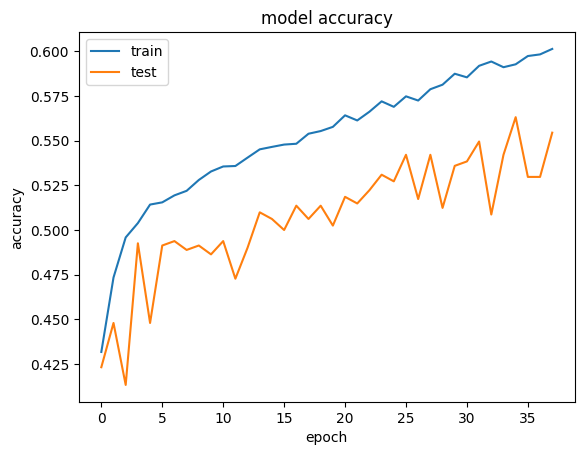

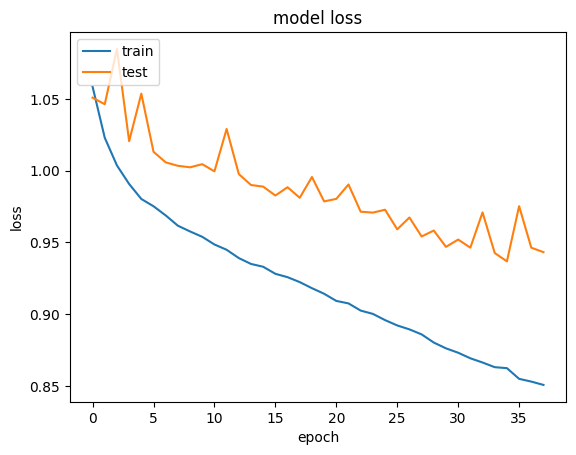

In [33]:
import matplotlib.pyplot as plt
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()